In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
os.chdir('Z:/Employee/A Bagwala/Gen AI and Python Stuff/Capstone projects/Healthcare Insurance Analytics')
hos = pd.read_csv('Hospitalisation Details.csv')

In [8]:
type(hos)

pandas.core.frame.DataFrame

In [10]:
hos.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013


In [11]:
hos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    2343 non-null   object 
 1   year           2343 non-null   object 
 2   month          2343 non-null   object 
 3   date           2343 non-null   int64  
 4   children       2343 non-null   int64  
 5   charges        2343 non-null   float64
 6   Hospital tier  2343 non-null   object 
 7   City tier      2343 non-null   object 
 8   State ID       2343 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 164.9+ KB


- It seems the data has no NUlls
- On careful inspection it seems that few fields have '?' in them, there count is too low. Therefore will drop them.

In [4]:
hos_new = hos[~hos.isin(['?']).any(axis=1)]

In [5]:
hos_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2342
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    2329 non-null   object 
 1   year           2329 non-null   object 
 2   month          2329 non-null   object 
 3   date           2329 non-null   int64  
 4   children       2329 non-null   int64  
 5   charges        2329 non-null   float64
 6   Hospital tier  2329 non-null   object 
 7   City tier      2329 non-null   object 
 8   State ID       2329 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 182.0+ KB


In [6]:
hos_new.describe()

,date,children,charges
count,2329.000000,2329.000000,2329.000000
mean,15.565908,1.026621,13536.422787
std,8.726518,1.234587,11862.500911
min,1.000000,0.000000,563.840000
25%,8.000000,0.000000,5124.190000
50%,15.000000,0.000000,9653.810000
75%,23.000000,2.000000,16990.550000
max,30.000000,5.000000,63770.430000


In [8]:
med = pd.read_csv('Medical Examinations.csv')

In [28]:
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   BMI                     2335 non-null   float64
 2   HBA1C                   2335 non-null   float64
 3   Heart Issues            2335 non-null   object 
 4   Any Transplants         2335 non-null   object 
 5   Cancer history          2335 non-null   object 
 6   NumberOfMajorSurgeries  2335 non-null   object 
 7   smoker                  2335 non-null   object 
dtypes: float64(2), object(6)
memory usage: 146.1+ KB


In [9]:
med_new = med[~med.isin(['?']).any(axis=1)]

In [31]:
med_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2334
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2333 non-null   object 
 1   BMI                     2333 non-null   float64
 2   HBA1C                   2333 non-null   float64
 3   Heart Issues            2333 non-null   object 
 4   Any Transplants         2333 non-null   object 
 5   Cancer history          2333 non-null   object 
 6   NumberOfMajorSurgeries  2333 non-null   object 
 7   smoker                  2333 non-null   object 
dtypes: float64(2), object(6)
memory usage: 164.0+ KB


In [32]:
med_new.describe()

,BMI,HBA1C
count,2333.000000,2333.000000
mean,30.978131,6.580411
std,8.743818,2.229163
min,15.010000,4.000000
25%,24.600000,4.900000
50%,30.400000,5.810000
75%,36.300000,7.960000
max,55.050000,12.000000


In [10]:
med_new['NumberOfMajorSurgeries'] = med_new['NumberOfMajorSurgeries'].replace('No major surgery', 0)

C:\Users\asrar.bagwala\AppData\Local\Temp\1\ipykernel_2680\254060946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_new['NumberOfMajorSurgeries'] = med_new['NumberOfMajorSurgeries'].replace('No major surgery', 0)


In [11]:
med_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2334
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2333 non-null   object 
 1   BMI                     2333 non-null   float64
 2   HBA1C                   2333 non-null   float64
 3   Heart Issues            2333 non-null   object 
 4   Any Transplants         2333 non-null   object 
 5   Cancer history          2333 non-null   object 
 6   NumberOfMajorSurgeries  2333 non-null   object 
 7   smoker                  2333 non-null   object 
dtypes: float64(2), object(6)
memory usage: 164.0+ KB


- COnverting Object dtype to numbers for some columns

In [12]:
hos_new['year'] = hos_new['year'].astype(int)

C:\Users\asrar.bagwala\AppData\Local\Temp\1\ipykernel_2680\2452625200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hos_new['year'] = hos_new['year'].astype(int)


In [47]:
hos_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2342
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    2329 non-null   object 
 1   year           2329 non-null   int32  
 2   month          2329 non-null   object 
 3   date           2329 non-null   int64  
 4   children       2329 non-null   int64  
 5   charges        2329 non-null   float64
 6   Hospital tier  2329 non-null   object 
 7   City tier      2329 non-null   object 
 8   State ID       2329 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 172.9+ KB


In [13]:
med_new['NumberOfMajorSurgeries'] = med_new['NumberOfMajorSurgeries'].astype(int)

C:\Users\asrar.bagwala\AppData\Local\Temp\1\ipykernel_2680\593102620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_new['NumberOfMajorSurgeries'] = med_new['NumberOfMajorSurgeries'].astype(int)


In [15]:
med_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2334
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2333 non-null   object 
 1   BMI                     2333 non-null   float64
 2   HBA1C                   2333 non-null   float64
 3   Heart Issues            2333 non-null   object 
 4   Any Transplants         2333 non-null   object 
 5   Cancer history          2333 non-null   object 
 6   NumberOfMajorSurgeries  2333 non-null   int32  
 7   smoker                  2333 non-null   object 
dtypes: float64(2), int32(1), object(5)
memory usage: 154.9+ KB


In [16]:
names=pd.read_excel('Names.xlsx')

- Adding Gender information by looking at Mr, Ms and Mrs in the names.

In [17]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  2335 non-null   object
 1   name         2335 non-null   object
dtypes: object(2)
memory usage: 36.6+ KB


In [18]:
names['gender'] = np.where(names['name'].str.contains('Mr\.'), 'Male',
                        np.where(names['name'].str.contains('Mrs\.|Ms\.'), 'Female', 'Unknown'))

In [19]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  2335 non-null   object
 1   name         2335 non-null   object
 2   gender       2335 non-null   object
dtypes: object(3)
memory usage: 54.9+ KB


In [20]:
names.head()

,Customer ID,name,gender
0,Id1,"Hawks, Ms. Kelly",Female
1,Id2,"Lehner, Mr. Matthew D",Male
2,Id3,"Lu, Mr. Phil",Male
3,Id4,"Osborne, Ms. Kelsey",Female
4,Id5,"Kadala, Ms. Kristyn",Female


### Now let's merge all three datasets based on Customer ID

In [21]:
# Join hos_new and med_new on 'Customer ID'
merged_df = pd.merge(hos_new, med_new, on='Customer ID', how='inner')

# Join the merged_df with names on 'Customer ID'
df = pd.merge(merged_df, names, on='Customer ID', how='inner')

print(df)


     Customer ID  year month  date  children   charges Hospital tier  \
0         Id2335  1992   Jul     9         0    563.84      tier - 2   
1         Id2334  1992   Nov    30         0    570.62      tier - 2   
2         Id2333  1993   Jun    30         0    600.00      tier - 2   
3         Id2332  1992   Sep    13         0    604.54      tier - 3   
4         Id2331  1998   Jul    27         0    637.26      tier - 3   
...          ...   ...   ...   ...       ...       ...           ...   
2320         Id6  1962   Aug     4         0  52590.83      tier - 1   
2321         Id5  1989   Jun    19         0  55135.40      tier - 1   
2322         Id4  1991   Jun     6         1  58571.07      tier - 1   
2323         Id2  1977   Jun     8         0  62592.87      tier - 2   
2324         Id1  1968   Oct    12         0  63770.43      tier - 1   

     City tier State ID     BMI  HBA1C Heart Issues Any Transplants  \
0     tier - 3    R1013  17.580   4.51           No             

In [63]:
df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,gender
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K",Male
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P",Male
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie",Female
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr.",Male
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan",Male


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2324
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2325 non-null   object 
 1   year                    2325 non-null   int32  
 2   month                   2325 non-null   object 
 3   date                    2325 non-null   int64  
 4   children                2325 non-null   int64  
 5   charges                 2325 non-null   float64
 6   Hospital tier           2325 non-null   object 
 7   City tier               2325 non-null   object 
 8   State ID                2325 non-null   object 
 9   BMI                     2325 non-null   float64
 10  HBA1C                   2325 non-null   float64
 11  Heart Issues            2325 non-null   object 
 12  Any Transplants         2325 non-null   object 
 13  Cancer history          2325 non-null   object 
 14  NumberOfMajorSurgeries  2325 non-null   

### Using year, month, date, let's create Age column.

In [22]:
# Combine into a full date
df['birthdate'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'] + '-' + df['date'].astype(str), format='%Y-%b-%d')


In [23]:
df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,gender,birthdate
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K",Male,1992-07-09
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P",Male,1992-11-30
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie",Female,1993-06-30
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr.",Male,1992-09-13
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan",Male,1998-07-27


In [24]:
from datetime import datetime
# Calculate the current date
current_date = pd.to_datetime(datetime.now().date())

# Calculate the age
df['Age'] = (current_date - df['birthdate']).astype('<m8[Y]')


In [72]:
df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,gender,birthdate,Age
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K",Male,1992-07-09,32.0
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P",Male,1992-11-30,31.0
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie",Female,1993-06-30,31.0
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr.",Male,1992-09-13,31.0
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan",Male,1998-07-27,26.0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2324
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Customer ID             2325 non-null   object        
 1   year                    2325 non-null   int32         
 2   month                   2325 non-null   object        
 3   date                    2325 non-null   int64         
 4   children                2325 non-null   int64         
 5   charges                 2325 non-null   float64       
 6   Hospital tier           2325 non-null   object        
 7   City tier               2325 non-null   object        
 8   State ID                2325 non-null   object        
 9   BMI                     2325 non-null   float64       
 10  HBA1C                   2325 non-null   float64       
 11  Heart Issues            2325 non-null   object        
 12  Any Transplants         2325 non-null   object  

### Now let's drop columns that are not needed.

In [25]:
# Columns to drop
columns_to_drop = ['Customer ID','year','month','date','name','birthdate']

# Drop the columns
df1 = df.drop(columns=columns_to_drop)

In [79]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2324
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   children                2325 non-null   int64  
 1   charges                 2325 non-null   float64
 2   Hospital tier           2325 non-null   object 
 3   City tier               2325 non-null   object 
 4   State ID                2325 non-null   object 
 5   BMI                     2325 non-null   float64
 6   HBA1C                   2325 non-null   float64
 7   Heart Issues            2325 non-null   object 
 8   Any Transplants         2325 non-null   object 
 9   Cancer history          2325 non-null   object 
 10  NumberOfMajorSurgeries  2325 non-null   int32  
 11  smoker                  2325 non-null   object 
 12  gender                  2325 non-null   object 
 13  Age                     2325 non-null   float64
dtypes: float64(4), int32(1), int64(1), objec

In [26]:
avg_charges = df1.groupby(['Hospital tier'])[['charges']].mean()
print(avg_charges)

                    charges
Hospital tier              
tier - 1       30131.995900
tier - 2       11875.883861
tier - 3        9487.456223


In [27]:
avg_charges = df1.groupby(['City tier'])[['charges']].mean()
print(avg_charges)

                charges
City tier              
tier - 1   13009.972579
tier - 2   13471.919281
tier - 3   14045.312066


In [28]:
avg_charges = df1.groupby(['gender'])[['charges']].mean()
print(avg_charges)

             charges
gender              
Female  12809.685056
Male    14236.704310


In [29]:
avg_charges = df1.groupby(['smoker'])[['charges']].mean()
print(avg_charges)

             charges
smoker              
No       8409.199250
yes     32866.960226


### Encoding Hospital and City Tiers where Tier 1 is best and most developed.

In [30]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order for ordinal encoding (Higher numbers for higher-ranked tiers)
tier_order = [['tier - 3', 'tier - 2', 'tier - 1']]# default order for encoding gives lower number to the one mentioned first

# Apply Ordinal Encoding with the reverse order
ordinal_encoder = OrdinalEncoder(categories=tier_order * 2)  # Multiply the list to apply the same order to both columns
df1[['Hospital tier Encoded', 'City tier Encoded']] = ordinal_encoder.fit_transform(df1[['Hospital tier', 'City tier']])

print(df1)


      children   charges Hospital tier City tier State ID     BMI  HBA1C  \
0            0    563.84      tier - 2  tier - 3    R1013  17.580   4.51   
1            0    570.62      tier - 2  tier - 1    R1013  17.600   4.39   
2            0    600.00      tier - 2  tier - 1    R1013  16.470   6.35   
3            0    604.54      tier - 3  tier - 3    R1013  17.700   6.28   
4            0    637.26      tier - 3  tier - 3    R1013  22.340   5.57   
...        ...       ...           ...       ...      ...     ...    ...   
2320         0  52590.83      tier - 1  tier - 3    R1011  32.800   6.59   
2321         0  55135.40      tier - 1  tier - 2    R1012  35.530   5.45   
2322         1  58571.07      tier - 1  tier - 3    R1024  38.095   6.05   
2323         0  62592.87      tier - 2  tier - 3    R1013  30.360   5.77   
2324         0  63770.43      tier - 1  tier - 3    R1013  47.410   7.47   

     Heart Issues Any Transplants Cancer history  NumberOfMajorSurgeries  \
0          

In [31]:
df1.head()

,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,gender,Age,Hospital tier Encoded,City tier Encoded
0,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,Male,32.0,1.0,0.0
1,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,Male,31.0,1.0,2.0
2,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,Female,31.0,1.0,2.0
3,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,Male,31.0,0.0,0.0
4,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,Male,26.0,0.0,0.0


In [32]:
print(df1['Heart Issues'].unique())
print(df1['Any Transplants'].unique())
print(df1['Cancer history'].unique())
print(df1['smoker'].unique())
print(df1['gender'].unique())
print(df1['State ID'].unique())

['No' 'yes']
['No' 'yes']
['No' 'Yes']
['No' 'yes']
['Male' 'Female']
['R1013' 'R1012' 'R1011' 'R1015' 'R1019' 'R1016' 'R1018' 'R1025' 'R1024'
 'R1023' 'R1014' 'R1021' 'R1017' 'R1020' 'R1026' 'R1022']


In [33]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid dummy variable trap

# Fit and transform the data, specifying the columns to encode
encoded_cols = onehot_encoder.fit_transform(df1[['Heart Issues', 'Any Transplants', 'Cancer history','smoker','gender','State ID']])

# Convert the encoded columns into a DataFrame
encoded_df = pd.DataFrame(encoded_cols, columns=onehot_encoder.get_feature_names_out(['Heart Issues', 'Any Transplants', 'Cancer history','smoker','gender','State ID']))

# Concatenate the original DataFrame with the encoded DataFrame
df2 = pd.concat([df1, encoded_df], axis=1)

print(df2)


      children   charges Hospital tier City tier State ID     BMI  HBA1C  \
0            0    563.84      tier - 2  tier - 3    R1013  17.580   4.51   
1            0    570.62      tier - 2  tier - 1    R1013  17.600   4.39   
2            0    600.00      tier - 2  tier - 1    R1013  16.470   6.35   
3            0    604.54      tier - 3  tier - 3    R1013  17.700   6.28   
4            0    637.26      tier - 3  tier - 3    R1013  22.340   5.57   
...        ...       ...           ...       ...      ...     ...    ...   
2320         0  52590.83      tier - 1  tier - 3    R1011  32.800   6.59   
2321         0  55135.40      tier - 1  tier - 2    R1012  35.530   5.45   
2322         1  58571.07      tier - 1  tier - 3    R1024  38.095   6.05   
2323         0  62592.87      tier - 2  tier - 3    R1013  30.360   5.77   
2324         0  63770.43      tier - 1  tier - 3    R1013  47.410   7.47   

     Heart Issues Any Transplants Cancer history  ...  State ID_R1017  \
0             

In [106]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2324
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   children                2325 non-null   int64  
 1   charges                 2325 non-null   float64
 2   Hospital tier           2325 non-null   object 
 3   City tier               2325 non-null   object 
 4   State ID                2325 non-null   object 
 5   BMI                     2325 non-null   float64
 6   HBA1C                   2325 non-null   float64
 7   Heart Issues            2325 non-null   object 
 8   Any Transplants         2325 non-null   object 
 9   Cancer history          2325 non-null   object 
 10  NumberOfMajorSurgeries  2325 non-null   int32  
 11  smoker                  2325 non-null   object 
 12  gender                  2325 non-null   object 
 13  Age                     2325 non-null   float64
 14  Hospital tier Encoded   2325 non-null   

In [108]:
df2.head()

,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,...,State ID_R1017,State ID_R1018,State ID_R1019,State ID_R1020,State ID_R1021,State ID_R1022,State ID_R1023,State ID_R1024,State ID_R1025,State ID_R1026
0,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Checking histogram of all numerical variables with Normal curve overlaid.

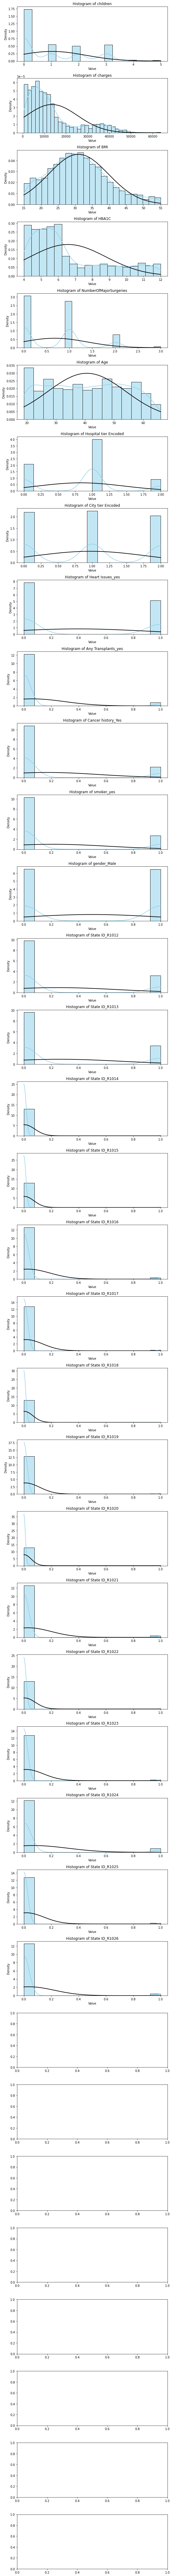

In [34]:
import numpy as np
from scipy.stats import norm
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(df2.columns), figsize=(8, 6 * len(df.columns)))

# Plot histograms with overlaid normal distribution curves for each column
for i, (column, data) in enumerate(df2.select_dtypes(include=['int', 'float']).items()):
    ax = axes[i]
    sns.histplot(data, kde=True, ax=ax, color='skyblue', stat='density')
    ax.set_title(f'Histogram of {column}')
    
    # Overlay normal distribution curve
    xmin, xmax = data.min(), data.max()
    x = np.linspace(xmin, xmax, 100)
    mu, sigma = data.mean(), data.std()
    p = norm.pdf(x, mu, sigma)
    ax.plot(x, p, 'k', linewidth=2)

    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

### looking at the histogram plots. It seems the target column 'charges' has a lot of outliers as its distribution is +ve skewed. Right tail is longer.

In [35]:
from scipy.stats import skew, kurtosis

# Select only numerical columns
numeric_cols = df2.select_dtypes(include=np.number)

# Calculate skewness and kurtosis for all numerical columns
skewness = numeric_cols.apply(skew)
kurtosis_value = numeric_cols.apply(kurtosis)

# Print skewness and kurtosis values for each column
for column in numeric_cols.columns:
    print(f"Column: {column}")
    print(f"Skewness: {skewness[column]}")
    print(f"Kurtosis: {kurtosis_value[column]}")
    
    # Determine if positively or negatively skewed
    if skewness[column] > 0:
        print("Skewed: Positive")
    elif skewness[column] < 0:
        print("Skewed: Negative")
    else:
        print("Skewed: Symmetric")

    # Identify outliers based on kurtosis
    if kurtosis_value[column] > 0:
        print("Outliers: Present (Leptokurtic)")
    elif kurtosis_value[column] < 0:
        print("Outliers: Absent (Platykurtic)")
    else:
        print("Outliers: No definite conclusion (Mesokurtic)")
    print()

Column: children
Skewness: 0.8509366712533162
Kurtosis: -0.44707591261890833
Skewed: Positive
Outliers: Absent (Platykurtic)

Column: charges
Skewness: 1.3153833173337197
Kurtosis: 0.8550877928038676
Skewed: Positive
Outliers: Present (Leptokurtic)

Column: BMI
Skewness: 0.4386071692441631
Kurtosis: -0.17029990127956562
Skewed: Positive
Outliers: Absent (Platykurtic)

Column: HBA1C
Skewness: 0.9892387602818724
Kurtosis: -0.230185803225615
Skewed: Positive
Outliers: Absent (Platykurtic)

Column: NumberOfMajorSurgeries
Skewness: 0.7213841728126441
Kurtosis: -0.1671008653113275
Skewed: Positive
Outliers: Absent (Platykurtic)

Column: Age
Skewness: 0.02593583529112686
Kurtosis: -1.1977071190125523
Skewed: Positive
Outliers: Absent (Platykurtic)

Column: Hospital tier Encoded
Skewness: 0.14881332247449358
Kurtosis: -0.5813407007809239
Skewed: Positive
Outliers: Absent (Platykurtic)

Column: City tier Encoded
Skewness: 0.04690328001233524
Kurtosis: -1.4653825042588255
Skewed: Positive
Outlie

### Above stats also confirm that charges have outliers. let's look at its boxplot

C:\Users\asrar.bagwala\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

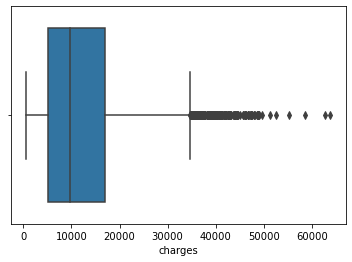

In [122]:
sns.boxplot(df2['charges'])

In [126]:
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')

,children,charges,BMI,HBA1C,NumberOfMajorSurgeries,Age,Hospital tier Encoded,City tier Encoded,Heart Issues_yes,Any Transplants_yes,Cancer history_Yes,smoker_yes,gender_Male,State ID_R1012,State ID_R1013,State ID_R1014,State ID_R1015,State ID_R1016,State ID_R1017,State ID_R1018,State ID_R1019,State ID_R1020,State ID_R1021,State ID_R1022,State ID_R1023,State ID_R1024,State ID_R1025,State ID_R1026
children,1.000000,0.055901,-0.005339,-0.101379,-0.113161,-0.006090,0.052438,0.015760,0.023984,-0.142040,-0.027880,0.017713,0.014332,0.005247,-0.013834,0.026500,0.034132,-0.003459,0.014357,-0.023730,-0.008815,-0.014784,-0.007701,-0.001600,-0.010896,0.002713,-0.024161,0.009092
charges,0.055901,1.000000,0.346730,0.139697,0.053308,0.304459,0.446687,-0.035300,0.049299,-0.127028,-0.022522,0.838462,0.060156,-0.074636,-0.150634,-0.000276,0.001652,0.000959,0.013581,-0.001308,0.001000,-0.018368,-0.068156,-0.018841,0.002874,-0.014374,-0.052795,-0.016841
BMI,-0.005339,0.346730,1.000000,-0.006920,0.018851,0.049882,0.104771,-0.038123,0.017129,0.015893,-0.020235,0.107126,0.015239,0.017939,-0.208744,-0.020150,-0.020974,-0.014175,-0.046017,-0.024191,-0.023244,-0.022116,0.015006,0.062800,0.163071,-0.056158,-0.019955,0.208242
HBA1C,-0.101379,0.139697,-0.006920,1.000000,-0.091594,0.460009,-0.057855,0.005404,0.007699,-0.159855,-0.170921,0.007257,-0.023890,-0.019513,0.033453,-0.020279,0.000805,0.002503,0.014971,0.026473,-0.019188,0.003540,-0.032254,-0.005778,-0.004686,-0.010989,-0.027929,-0.003472
NumberOfMajorSurgeries,-0.113161,0.053308,0.018851,-0.091594,1.000000,0.151900,-0.033230,-0.027937,0.206147,0.158593,0.204208,0.017199,0.003842,-0.002098,-0.002056,0.009822,0.013758,0.013825,-0.021101,0.038012,-0.014711,0.023101,-0.001054,-0.011366,0.006287,0.008505,0.018399,-0.031499
Age,-0.006090,0.304459,0.049882,0.460009,0.151900,1.000000,-0.132833,0.007777,0.193166,-0.381011,-0.100999,0.011254,-0.021348,-0.004474,-0.012440,0.003684,-0.033871,0.010866,0.009466,-0.016130,-0.014644,0.030133,-0.014698,-0.016216,0.015265,0.014625,0.006691,0.008068
Hospital tier Encoded,0.052438,0.446687,0.104771,-0.057855,-0.033230,-0.132833,1.000000,-0.039755,-0.053376,-0.011729,0.021429,0.474077,0.006927,-0.020272,-0.002455,0.093139,-0.001491,-0.105167,0.000299,0.005639,-0.004069,-0.026756,-0.044798,-0.023315,0.002100,0.012802,-0.074839,-0.065303
City tier Encoded,0.015760,-0.035300,-0.038123,0.005404,-0.027937,0.007777,-0.039755,1.000000,-0.023152,-0.002970,0.018639,-0.032034,-0.059716,0.018253,-0.002766,0.023823,0.002203,0.018396,0.004007,-0.006584,0.003398,0.001625,0.005630,0.002487,-0.016882,0.000218,0.028802,0.003333
Heart Issues_yes,0.023984,0.049299,0.017129,0.007699,0.206147,0.193166,-0.053376,-0.023152,1.000000,-0.140269,0.111190,-0.007159,-0.001778,0.021770,-0.027967,-0.001700,0.008297,-0.017873,0.005377,-0.007950,-0.002410,0.045523,-0.039628,-0.006137,0.020557,0.007262,0.007928,0.013015
Any Transplants_yes,-0.142040,-0.127028,0.015893,-0.159855,0.158593,-0.381011,-0.011729,-0.002970,-0.140269,1.000000,-0.114677,-0.025101,0.004141,-0.066453,0.064563,-0.019125,0.060938,0.033934,-0.017438,0.070874,0.058279,-0.012973,-0.013404,0.049797,0.009620,0.051867,0.007694,-0.039753


- BMI, Age, Hospital tier, smoker have high correlation with charges
- HBA1C, transplants, State R1013 have medium correlation with charges

In [36]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df2.select_dtypes(include=[float, int]).drop(columns=['charges'])  # Select only numerical features
X = sm.add_constant(X)  # Add a constant column for the intercept

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                   Feature        VIF
0                    const  42.497888
1                 children   1.058424
2                      BMI   1.176518
3                    HBA1C   1.368998
4   NumberOfMajorSurgeries   1.258633
5                      Age   1.704672
6    Hospital tier Encoded   1.394761
7        City tier Encoded   1.012557
8         Heart Issues_yes   1.107711
9      Any Transplants_yes   1.394831
10      Cancer history_Yes   1.153745
11              smoker_yes   1.497887
12             gender_Male   1.331860
13          State ID_R1012   1.644657
14          State ID_R1013   1.724821
15          State ID_R1014   1.045416
16          State ID_R1015   1.032980
17          State ID_R1016   1.147548
18          State ID_R1017   1.079652
19          State ID_R1018   1.029862
20          State ID_R1019   1.061743
21          State ID_R1020   1.019973
22          State ID_R1021   1.182085
23          State ID_R1022   1.043264
24          State ID_R1023   1.107849
25          

### No features can be dropped as all have VIF around 1. There seems no collinearity within feature variables. Can proceed with Model creation now.

In [37]:
column_names = df2.columns.tolist()
print(column_names)

['children', 'charges', 'Hospital tier', 'City tier', 'State ID', 'BMI', 'HBA1C', 'Heart Issues', 'Any Transplants', 'Cancer history', 'NumberOfMajorSurgeries', 'smoker', 'gender', 'Age', 'Hospital tier Encoded', 'City tier Encoded', 'Heart Issues_yes', 'Any Transplants_yes', 'Cancer history_Yes', 'smoker_yes', 'gender_Male', 'State ID_R1012', 'State ID_R1013', 'State ID_R1014', 'State ID_R1015', 'State ID_R1016', 'State ID_R1017', 'State ID_R1018', 'State ID_R1019', 'State ID_R1020', 'State ID_R1021', 'State ID_R1022', 'State ID_R1023', 'State ID_R1024', 'State ID_R1025', 'State ID_R1026']


### Checking hypothesis as asked in the PDF

In [38]:
from scipy.stats import f_oneway

# Assuming 'charges' is the dependent variable and 'hospital_tier' is the categorical variable
tier_1 = df2[df2['Hospital tier'] == 'tier - 1']['charges']
tier_2 = df2[df2['Hospital tier'] == 'tier - 2']['charges']
tier_3 = df2[df2['Hospital tier'] == 'tier - 3']['charges']

F_statistic, p_value = f_oneway(tier_1, tier_2, tier_3)

print(F_statistic)
print(p_value)


493.98956631117636
1.7738221310852664e-179


- p-value is too low, that means mean of different hospital tiers is different.

In [39]:
from scipy.stats import f_oneway

# Assuming 'charges' is the dependent variable and 'hospital_tier' is the categorical variable
tier_1 = df2[df2['City tier'] == 'tier - 1']['charges']
tier_2 = df2[df2['City tier'] == 'tier - 2']['charges']
tier_3 = df2[df2['City tier'] == 'tier - 3']['charges']

F_statistic, p_value = f_oneway(tier_1, tier_2, tier_3)

print(F_statistic)
print(p_value)


1.4543557561814688
0.23376344386881315


- p-value is more than 0.05, that means mean of different cit tiers is not different.

In [40]:
from scipy.stats import ttest_ind

# Assuming 'smoker' is a binary categorical variable with 'Y' for smokers and 'N' for non-smokers
smokers = df2[df2['smoker'] == 'yes']['charges']
non_smokers = df2[df2['smoker'] == 'No']['charges']

t_statistic, p_value = ttest_ind(smokers, non_smokers)

print(F_statistic)
print(p_value)


1.4543557561814688
0.0


- p-value is too low, that means mean of smokers is different.

In [41]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['smoker'], df['Heart Issues'])

chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)

print(chi2_statistic)
print(p_value)
print(dof)
print(expected)


0.08588150449910657
0.7694797581780767
1
[[1111.30967742  727.69032258]
 [ 293.69032258  192.30967742]]


- Smoking and Heart Issues are independent as p-value is quite high so we cannot reject the NUll hypothesis. This is also confirmed by the correlation heatmap. It shows very little correlation.

In [42]:
df3=df2.drop(columns=['Hospital tier', 'City tier', 'State ID','Heart Issues', 'Any Transplants', 'Cancer history','smoker', 'gender'])

In [140]:
df3.head()

,children,charges,BMI,HBA1C,NumberOfMajorSurgeries,Age,Hospital tier Encoded,City tier Encoded,Heart Issues_yes,Any Transplants_yes,...,State ID_R1017,State ID_R1018,State ID_R1019,State ID_R1020,State ID_R1021,State ID_R1022,State ID_R1023,State ID_R1024,State ID_R1025,State ID_R1026
0,0,563.84,17.58,4.51,1,32.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,570.62,17.60,4.39,1,31.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,600.00,16.47,6.35,1,31.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,604.54,17.70,6.28,1,31.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,637.26,22.34,5.57,1,26.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
y = df3['charges'] 
X = df3.drop('charges', axis=1) 

# Adding intercept
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     526.6
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:15:56   Log-Likelihood:                -22817.
No. Observations:                2325   AIC:                         4.569e+04
Df Residuals:                    2297   BIC:                         4.585e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.44

### selecting all feature variables whose p value >0.05

In [44]:
import statsmodels.api as sm

# Assuming 'results' is your OLS regression output from sm.OLS
p_values = model.pvalues  # Get p-values from the model

# Select columns where p-value is greater than or equal to 0.05
insignificant_columns = p_values[p_values >= 0.05].index

print(insignificant_columns)


Index(['HBA1C', 'NumberOfMajorSurgeries', 'City tier Encoded',
       'Heart Issues_yes', 'Any Transplants_yes', 'Cancer history_Yes',
       'gender_Male', 'State ID_R1012', 'State ID_R1013', 'State ID_R1014',
       'State ID_R1017', 'State ID_R1018', 'State ID_R1019', 'State ID_R1020',
       'State ID_R1021', 'State ID_R1022', 'State ID_R1023', 'State ID_R1024',
       'State ID_R1025'],
      dtype='object')


In [45]:
df4=df3.drop(columns = insignificant_columns)

In [146]:
df4.head()

,children,charges,BMI,Age,Hospital tier Encoded,smoker_yes,State ID_R1015,State ID_R1016,State ID_R1026
0,0,563.84,17.58,32.0,1.0,0.0,0.0,0.0,0.0
1,0,570.62,17.60,31.0,1.0,0.0,0.0,0.0,0.0
2,0,600.00,16.47,31.0,1.0,0.0,0.0,0.0,0.0
3,0,604.54,17.70,31.0,0.0,0.0,0.0,0.0,0.0
4,0,637.26,22.34,26.0,0.0,0.0,0.0,0.0,0.0


In [46]:
y = df4['charges'] 
X = df4.drop('charges', axis=1) 

# Adding intercept
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     1771.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:16:29   Log-Likelihood:                -22828.
No. Observations:                2325   AIC:                         4.567e+04
Df Residuals:                    2316   BIC:                         4.573e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.389e+

In [47]:
def calculate_residuals(model, features, label):
    predictions =  model.predict(features)
    df_results = pd.DataFrame({'Actual' : label, 'Predicted' : predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    return df_results

In [48]:
def linear_assumptions(model, features, label):
    df_results = calculate_residuals(model, features, label)

    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height=7)
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

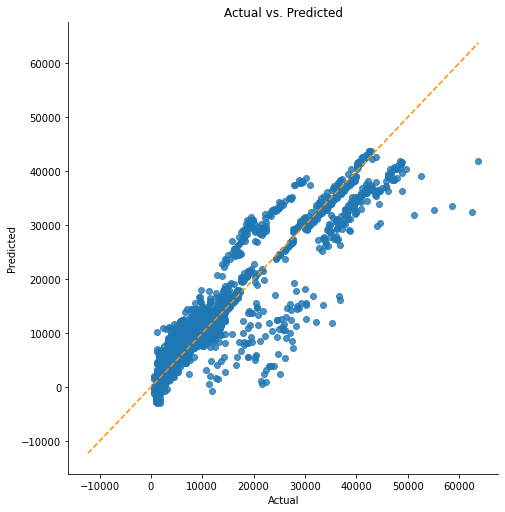

In [154]:
linear_assumptions(model, X, y)

### Line seems like a good fit. Let's check for homoskedasticity

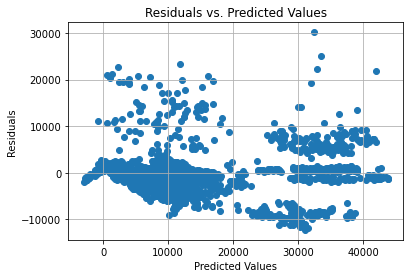

In [49]:
# Calculate residuals using your function (corrected for actual difference)
df_results = calculate_residuals(model, X, y)
residuals = df_results['Residuals']
predictions = df_results['Predicted']

# Plot residuals vs. predicted values
plt.scatter(predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.grid(True)
plt.show()

In [50]:
# Breusch-Pagan Test

from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model.resid, model.model.exog)
print("Breusch-Pagan Test:")
print("LM statistic:", bp_test[0])
print("p-value:", bp_test[1])

Breusch-Pagan Test:
LM statistic: 128.45791758628897
p-value: 5.9046877901976866e-24


### there is heteroskedasticity in the model. it is may be due to feature variables not being properly scaled. Let's stat with df3 again and do train test split and scaling.

In [51]:
from sklearn.model_selection import train_test_split

X=df3.drop(columns=['charges'])
y=df3['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [52]:
df3.columns.tolist()

['children',
 'charges',
 'BMI',
 'HBA1C',
 'NumberOfMajorSurgeries',
 'Age',
 'Hospital tier Encoded',
 'City tier Encoded',
 'Heart Issues_yes',
 'Any Transplants_yes',
 'Cancer history_Yes',
 'smoker_yes',
 'gender_Male',
 'State ID_R1012',
 'State ID_R1013',
 'State ID_R1014',
 'State ID_R1015',
 'State ID_R1016',
 'State ID_R1017',
 'State ID_R1018',
 'State ID_R1019',
 'State ID_R1020',
 'State ID_R1021',
 'State ID_R1022',
 'State ID_R1023',
 'State ID_R1024',
 'State ID_R1025',
 'State ID_R1026']

In [53]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['children', 'BMI', 'HBA1C' ,'NumberOfMajorSurgeries', 'Age','Hospital tier Encoded','City tier Encoded'] 

scaler = MinMaxScaler()

X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [54]:
X_train.head()

,children,BMI,HBA1C,NumberOfMajorSurgeries,Age,Hospital tier Encoded,City tier Encoded,Heart Issues_yes,Any Transplants_yes,Cancer history_Yes,...,State ID_R1017,State ID_R1018,State ID_R1019,State ID_R1020,State ID_R1021,State ID_R1022,State ID_R1023,State ID_R1024,State ID_R1025,State ID_R1026
874,0.8,0.349262,0.82000,0.333333,0.382979,0.5,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
534,0.2,0.329997,0.16625,0.000000,0.319149,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.0,0.033025,0.17500,0.333333,0.234043,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1210,1.0,0.268201,0.19000,0.000000,0.595745,0.0,0.5,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1493,0.0,0.412059,0.26375,0.333333,0.851064,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on both training and testing sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate R-squared for training and testing sets
r_squared_train = model.score(X_train, y_train)
r_squared_test = model.score(X_test, y_test)

# Print R-squared values
print("R-squared (Training):", r_squared_train)
print("R-squared (Testing):", r_squared_test)


R-squared (Training): 0.8670356400589305
R-squared (Testing): 0.8433102390913564


In [56]:
# Breusch-Pagan Test

from statsmodels.stats.diagnostic import het_breuschpagan

# Calculate residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

bp_train = het_breuschpagan(residuals_train, X_train)
bp_test = het_breuschpagan(residuals_test, X_test)

print("Breusch-Pagan Train:")
print("LM statistic:", bp_train[0])
print("p-value:", bp_train[1])

print("Breusch-Pagan Test:")
print("LM statistic:", bp_test[0])
print("p-value:", bp_test[1])

Breusch-Pagan Train:
LM statistic: 292.8961985041413
p-value: 5.534927430079447e-47
Breusch-Pagan Test:
LM statistic: 151.95035733965054
p-value: 9.237536183248932e-20
